In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#import ace_tools as tools
# OR, if using Jupyter Notebook
from IPython.display import display
#display(clustered_features_df)

In [2]:
#Data Sources
PATH = './dataset_nonIID'

In [4]:
for i in range(1, 5):
    benign = f"{PATH}/client_{i}/client_{i}_benign.csv"
    attack = f"{PATH}/client_{i}/client_{i}_known_attack.csv"
    #dataframe = pd.concat([pd.read_csv(benign), pd.read_csv(attack)], ignore_index=True)
    locals()[f"client_{i}"] = pd.concat([pd.read_csv(benign), pd.read_csv(attack)], ignore_index=True)
    print(locals()[f"client_{i}"].groupby(['Label']).size().reset_index(name="Count"))



   Label   Count
0      0  200000
1      1  200000
   Label   Count
0      0  185943
1      1  200000
   Label   Count
0      0  200000
1      1  200000
   Label   Count
0      0  200000
1      1  200000


## Manual Feature Analysis

In [5]:
FEATURES = ['Flow Duration' ,'Total Fwd Packet' ,'Total Bwd packets' ,'Total Length of Fwd Packet' ,'Total Length of Bwd Packet' ,'Fwd Packet Length Max' ,'Fwd Packet Length Min' ,'Fwd Packet Length Std' ,'Bwd Packet Length Max' ,'Bwd Packet Length Min' ,'Bwd Packet Length Std' ,'Flow IAT Mean' ,'Flow IAT Std' ,'Flow IAT Max' ,'Flow IAT Min' ,'Fwd IAT Total' ,'Fwd IAT Std' ,'Fwd IAT Max' ,'Fwd IAT Min' ,'Bwd IAT Total' ,'Bwd IAT Std' ,'Bwd IAT Max' ,'Bwd IAT Min' ,'Fwd Header Length' ,'Bwd Header Length' ,'Packet Length Min' ,'Packet Length Max' ,'Packet Length Std' ,'Packet Length Variance' ,'FWD Init Win Bytes' ,'Bwd Init Win Bytes' ,'Fwd Act Data Pkts' ,'Fwd Seg Size Min' ,'Active Mean' ,'Active Std' ,'Active Max' ,'Active Min' ,'Idle Mean' ,'Idle Std' ,'Idle Max' ,'Idle Min', 'Label']

In [15]:
# # Assuming 'clients' is a dictionary of client dataframes
# all_independent_features = pd.DataFrame()

# for key, element in clients.items():
#     print(key)
#     independent_features_df =  measure_correlation(locals()[key][test_features], co_efficent = 0.01)
#      # Rename 'Score' column to 'Score_X' where X is the current iteration number
#     independent_features_df.rename(columns={'Score': f'Score_{key}'}, inplace=True)

#     # Merge the results to keep the 'Feature' column as the common key
#     if all_independent_features.empty:
#         all_independent_features = independent_features_df
#     else:
#         all_independent_features = pd.merge(all_independent_features, independent_features_df, on='Feature', how='outer')

    
# # Display the final combined DataFrame
# #print(all_independent_features)  

In [16]:
#all_independent_features.to_csv("Feature_Correlation_Scores.csv", index=False)

In [6]:
def cluster_correlated_features(df, threshold=0.95):
    # Compute the correlation matrix
    correlation_matrix = df.corr().abs()  # Get absolute correlation values

    # Convert correlation matrix to distance matrix (1 - correlation)
    distance_matrix = 1 - correlation_matrix

    # Perform hierarchical clustering
    linkage_matrix = sch.linkage(distance_matrix, method='ward')
    
    # Create clusters based on the threshold
    cluster_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1-threshold, linkage='ward')
    cluster_labels = cluster_model.fit_predict(distance_matrix)

    # Create a DataFrame showing feature groups
    clustered_features = pd.DataFrame({
        "Feature": df.columns,
        "Cluster": cluster_labels
    })

    # Sort by cluster
    clustered_features = clustered_features.sort_values(by="Cluster")
    
    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    sch.dendrogram(linkage_matrix, labels=df.columns, leaf_rotation=90)
    plt.title('Hierarchical Clustering Dendrogram of Features')
    plt.xlabel('Features')
    plt.ylabel('Distance')
    plt.show()
    
    return clustered_features


client_1


/tmp/ipykernel_4193490/1643645634.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


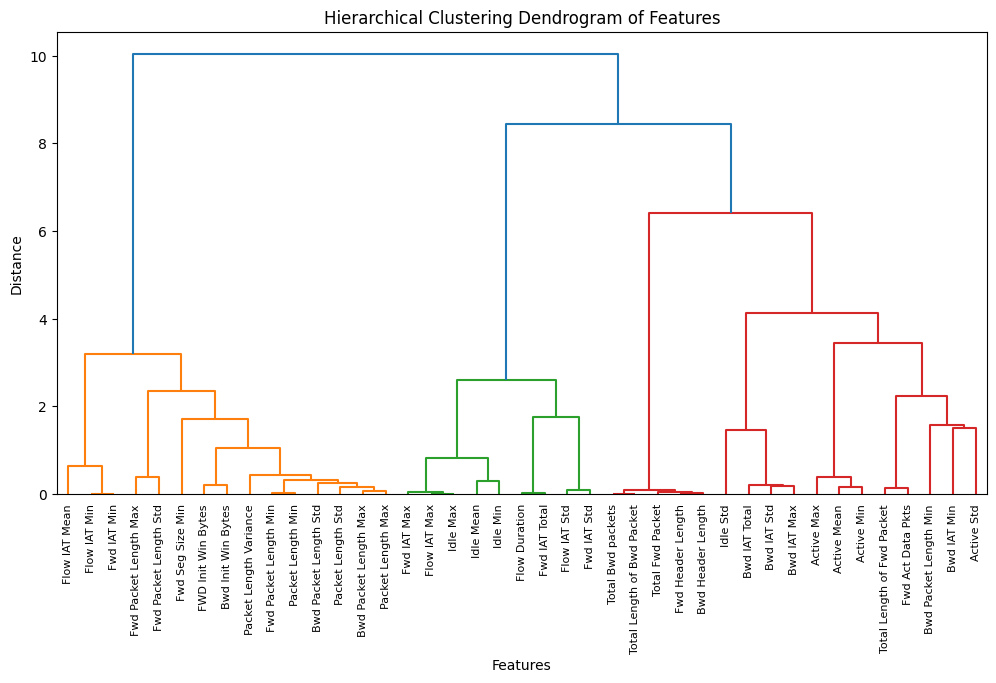

,Feature,Cluster
39,Idle Max,0
17,Fwd IAT Max,0
13,Flow IAT Max,0
1,Total Fwd Packet,1
24,Bwd Header Length,1
23,Fwd Header Length,1
40,Idle Min,2
2,Total Bwd packets,3
4,Total Length of Bwd Packet,3
15,Fwd IAT Total,4


client_2


/tmp/ipykernel_4193490/1643645634.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


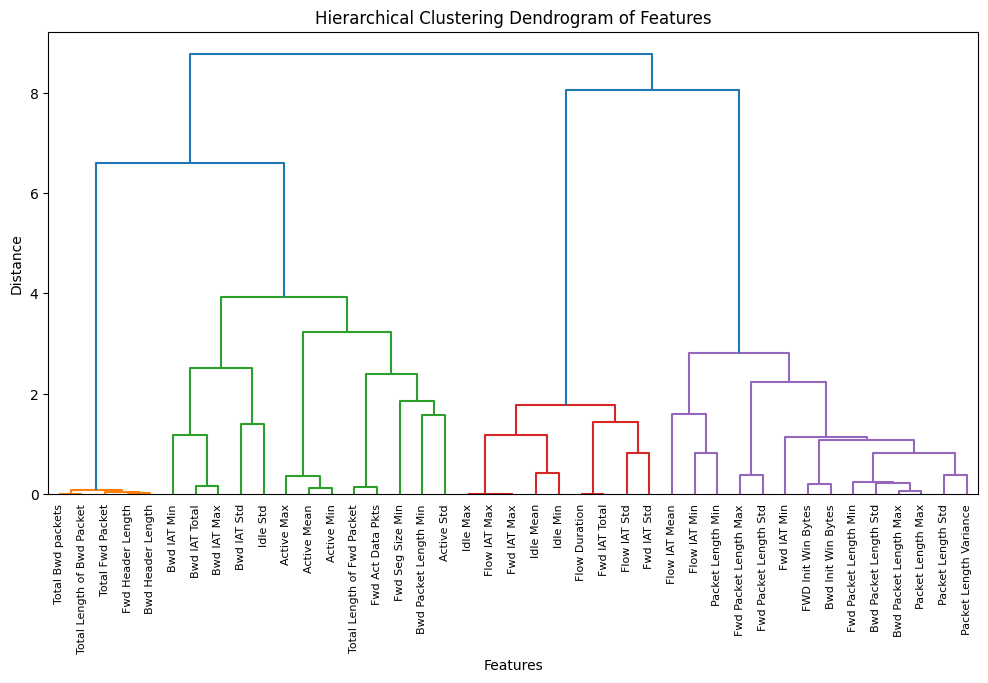

,Feature,Cluster
1,Total Fwd Packet,0
24,Bwd Header Length,0
23,Fwd Header Length,0
2,Total Bwd packets,1
4,Total Length of Bwd Packet,1
0,Flow Duration,2
15,Fwd IAT Total,2
39,Idle Max,3
17,Fwd IAT Max,3
13,Flow IAT Max,3


client_3


/tmp/ipykernel_4193490/1643645634.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


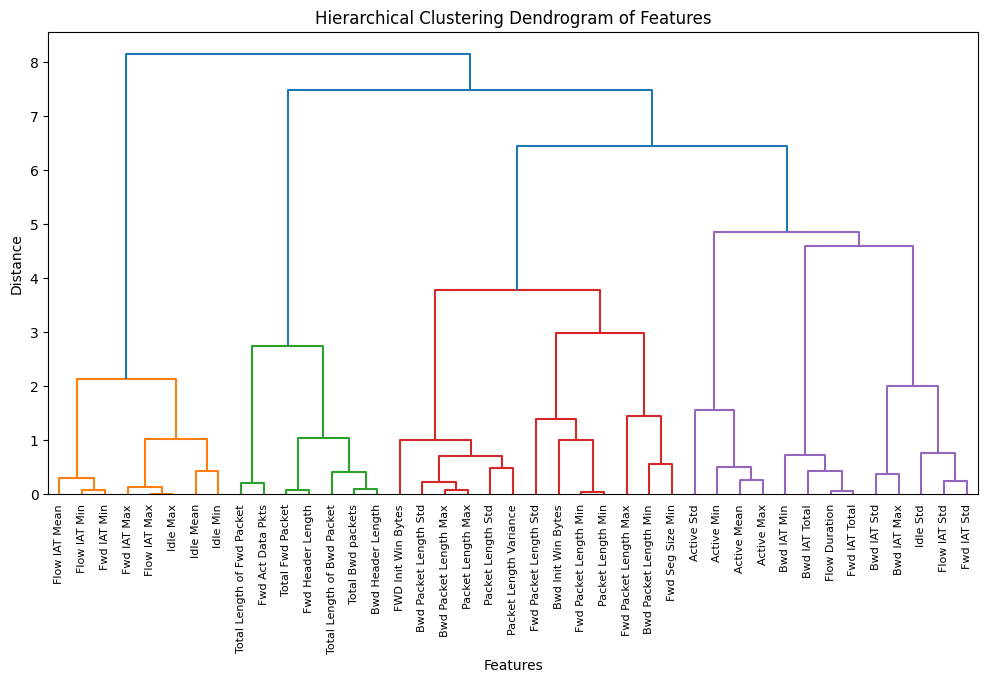

,Feature,Cluster
0,Flow Duration,0
15,Fwd IAT Total,0
6,Fwd Packet Length Min,1
25,Packet Length Min,1
37,Idle Mean,2
38,Idle Std,3
39,Idle Max,4
13,Flow IAT Max,4
34,Active Std,5
35,Active Max,6


client_4


/tmp/ipykernel_4193490/1643645634.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


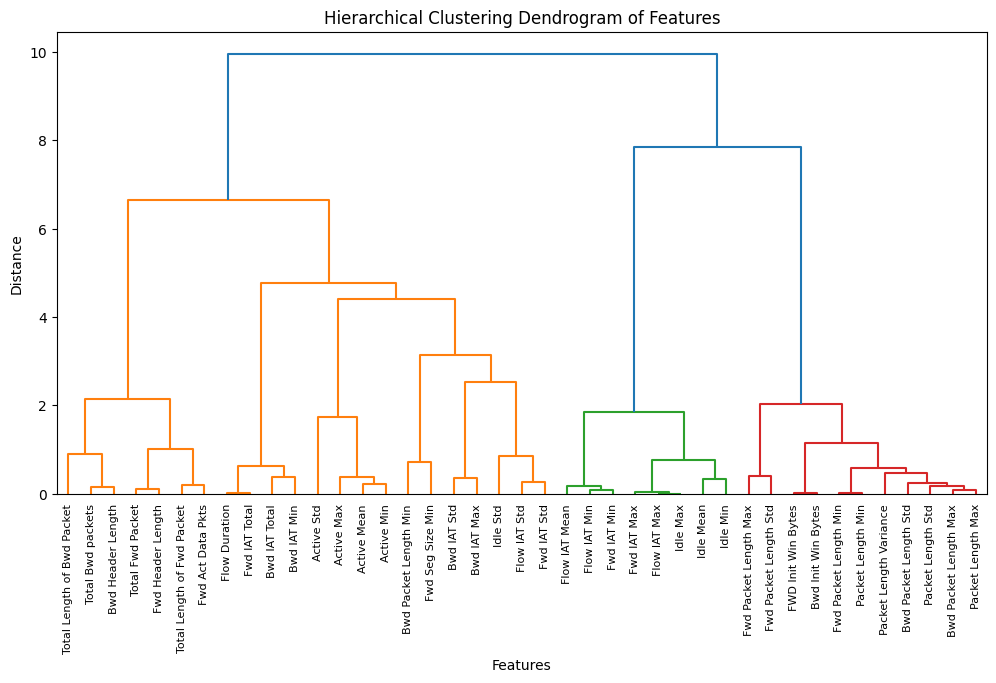

,Feature,Cluster
30,Bwd Init Win Bytes,0
29,FWD Init Win Bytes,0
25,Packet Length Min,1
6,Fwd Packet Length Min,1
39,Idle Max,2
13,Flow IAT Max,2
0,Flow Duration,3
15,Fwd IAT Total,3
35,Active Max,4
37,Idle Mean,5


In [8]:
for i in range(1,5):
    key = f"client_{i}"
    print(key)
    df = locals()[key][FEATURES]
    df = df.drop(columns=["Label"])
    
    clustered_features_df = cluster_correlated_features(df, threshold=0.95)
    display(clustered_features_df)
    #tools.display_dataframe_to_user(name="Clustered Highly Correlated Features", dataframe=clustered_features_df)



## Make Cluster and then Calculate corelation with Label

In [9]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

def get_feature_clusters_and_correlation(df, label_column, cluster_threshold=0.95):
    """
    Performs feature clustering based on correlation and calculates feature-to-label correlation.
    
    :param df: Pandas DataFrame containing features and target label.
    :param label_column: The name of the target variable (binary classification).
    :param cluster_threshold: Threshold for clustering highly correlated features.
    
    :return: DataFrame with Feature Name, Cluster ID, and Correlation with Label.
    """
    # 1️⃣ Compute feature-to-feature correlation matrix
    feature_columns = [col for col in df.columns if col != label_column]
    correlation_matrix = df[feature_columns].corr().abs()  # Absolute correlation
    
    # 2️⃣ Convert correlation matrix to distance matrix (1 - correlation)
    distance_matrix = 1 - correlation_matrix
    
    # 3️⃣ Perform hierarchical clustering (ward linkage minimizes variance)
    linkage_matrix = sch.linkage(distance_matrix, method='ward')
    
    # 4️⃣ Agglomerative clustering to form clusters
    cluster_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1 - cluster_threshold, linkage='ward')
    cluster_labels = cluster_model.fit_predict(distance_matrix)
    
    # 5️⃣ Create DataFrame for feature clusters
    clustered_features = pd.DataFrame({
        "Feature": feature_columns,
        "Cluster": cluster_labels
    })
    
    # 6️⃣ Compute absolute correlation with the label (binary classification)
    feature_label_correlation = df[feature_columns].corrwith(df[label_column]).abs()
    
    # 7️⃣ Merge cluster information with feature-label correlation
    clustered_features["Label_Correlation"] = clustered_features["Feature"].map(feature_label_correlation)
    
    return clustered_features.sort_values(by="Cluster")



## Get the Best Features

In [10]:
def select_best_features_per_cluster(clustered_df):
    """
    Selects the best feature from each cluster based on the highest correlation with the label.
    Sorts the selected features by correlation and assigns a ranking.

    :param clustered_df: DataFrame containing Feature, Cluster, and Label_Correlation columns.
    :param output_file: Name of the CSV file to store the results.

    :return: Ranked DataFrame with the best feature per cluster.
    """
    # 1️⃣ Select the feature with the highest correlation per cluster
    best_features = clustered_df.loc[clustered_df.groupby("Cluster")["Label_Correlation"].idxmax()]
    
    # 2️⃣ Sort by correlation value in descending order
    best_features = best_features.sort_values(by="Label_Correlation", ascending=False).reset_index(drop=True)
    
    # 3️⃣ Add a rank column (1 = highest correlation)
    best_features.insert(0, "Rank", range(1, len(best_features) + 1))
    return best_features

In [14]:
for i in range(1, 5):
    key = f"client_{i}"
   
    df = locals()[key][FEATURES]
    clustered_result = get_feature_clusters_and_correlation(df, label_column="Label", cluster_threshold=0.9)   
    final_features = select_best_features_per_cluster(clustered_result)
    clustered_result.rename(columns={'Feature': 'original'}, inplace=True)
    clustered_result.to_csv(f'./Generated_Feature_FL_non_FL_nonIID/clusterwise_features_{key}.csv', index=False)

    final_features.rename(columns={'Feature': 'original'}, inplace=True)
    final_features.to_csv(f'./Generated_Feature_FL_non_FL_nonIID/final_features_{key}.csv', index=False)
    display(clustered_result)
    display(final_features)



/tmp/ipykernel_4193490/2158537172.py:23: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


,original,Cluster,Label_Correlation
16,Fwd IAT Std,0,0.043153
12,Flow IAT Std,0,0.034781
1,Total Fwd Packet,1,0.012497
2,Total Bwd packets,1,0.008544
4,Total Length of Bwd Packet,1,0.007734
23,Fwd Header Length,1,0.010825
24,Bwd Header Length,1,0.007577
40,Idle Min,2,0.372406
39,Idle Max,3,0.316814
13,Flow IAT Max,3,0.314653


,Rank,original,Cluster,Label_Correlation
0,1,Packet Length Min,21,0.973790
1,2,Bwd Packet Length Max,4,0.931090
2,3,Packet Length Std,28,0.905527
3,4,Bwd Packet Length Std,24,0.897338
4,5,FWD Init Win Bytes,11,0.858129
5,6,Packet Length Variance,18,0.838118
6,7,Bwd Init Win Bytes,14,0.803886
7,8,Fwd Packet Length Std,23,0.680991
8,9,Flow IAT Min,7,0.640069
9,10,Flow IAT Mean,17,0.607982


/tmp/ipykernel_4193490/2158537172.py:23: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


,original,Cluster,Label_Correlation
1,Total Fwd Packet,0,0.011678
2,Total Bwd packets,0,0.008266
4,Total Length of Bwd Packet,0,0.007576
24,Bwd Header Length,0,0.007385
23,Fwd Header Length,0,0.009413
26,Packet Length Max,1,0.901749
8,Bwd Packet Length Max,1,0.932809
0,Flow Duration,2,0.169897
15,Fwd IAT Total,2,0.169996
39,Idle Max,3,0.284929


,Rank,original,Cluster,Label_Correlation
0,1,Fwd Packet Length Min,27,0.974062
1,2,Bwd Packet Length Max,1,0.932809
2,3,Bwd Packet Length Std,13,0.899207
3,4,FWD Init Win Bytes,14,0.860231
4,5,Packet Length Std,26,0.821686
5,6,Packet Length Variance,29,0.817761
6,7,Bwd Init Win Bytes,16,0.807861
7,8,Fwd IAT Min,18,0.795388
8,9,Fwd Packet Length Std,19,0.686717
9,10,Bwd IAT Min,17,0.570204


/tmp/ipykernel_4193490/2158537172.py:23: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


,original,Cluster,Label_Correlation
2,Total Bwd packets,0,0.025229
24,Bwd Header Length,0,0.020452
18,Fwd IAT Min,1,0.196821
14,Flow IAT Min,1,0.199987
1,Total Fwd Packet,2,0.026164
23,Fwd Header Length,2,0.023233
26,Packet Length Max,3,0.922883
8,Bwd Packet Length Max,3,0.933578
15,Fwd IAT Total,4,0.107552
0,Flow Duration,4,0.110699


,Rank,original,Cluster,Label_Correlation
0,1,Bwd Packet Length Max,3,0.933578
1,2,Bwd Packet Length Std,31,0.891348
2,3,FWD Init Win Bytes,16,0.846570
3,4,Packet Length Std,23,0.794450
4,5,Packet Length Variance,29,0.770223
5,6,Fwd Packet Length Max,25,0.660684
6,7,Bwd IAT Std,13,0.471579
7,8,Packet Length Min,7,0.432563
8,9,Bwd IAT Max,18,0.410756
9,10,Fwd Seg Size Min,24,0.282017


/tmp/ipykernel_4193490/2158537172.py:23: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')
/home/sharedrive/PythonCodes/.venv311_new/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


,original,Cluster,Label_Correlation
26,Packet Length Max,0,0.921268
8,Bwd Packet Length Max,0,0.932390
18,Fwd IAT Min,1,0.455658
14,Flow IAT Min,1,0.458571
30,Bwd Init Win Bytes,2,0.851321
29,FWD Init Win Bytes,2,0.851277
39,Idle Max,3,0.192768
17,Fwd IAT Max,3,0.195535
13,Flow IAT Max,3,0.191034
6,Fwd Packet Length Min,4,0.989593


,Rank,original,Cluster,Label_Correlation
0,1,Packet Length Min,4,0.990248
1,2,Bwd Packet Length Max,0,0.932390
2,3,Packet Length Std,14,0.910858
3,4,Bwd Packet Length Std,27,0.890188
4,5,Bwd Init Win Bytes,2,0.851321
5,6,Packet Length Variance,20,0.810236
6,7,Fwd Packet Length Std,25,0.764164
7,8,Fwd Packet Length Max,21,0.659350
8,9,Bwd IAT Max,28,0.520681
9,10,Bwd IAT Std,24,0.509184


In [15]:
df = pd.read_csv("/home/sharedrive/PythonCodes/FL_IDS/IDS/feature_engineering/dataset_nonIID/client_1/fold_1/client_1_scaled_train_dataset.csv")

In [19]:
df.groupby(['Label', 'Type']).count()

Flow Duration  Total Fwd Packet  Total Bwd packets  \
Label Type                                                           
0     benign_0          81055             81055              81055   
      benign_1          41062             41062              41062   
      benign_2              3                 3                  3   
      benign_3          37880             37880              37880   
1     fin               79912             79912              79912   
      udp               80088             80088              80088   

                Total Length of Fwd Packet  Total Length of Bwd Packet  \
Label Type                                                               
0     benign_0                       81055                       81055   
      benign_1                       41062                       41062   
      benign_2                           3                           3   
      benign_3                       37880                       37880   
1     fin                            79912                       79912   
      udp                            80088                       80088   

                Fwd Packet Length Max  Fwd Packet Length Min  \
Label Type                                                     
0     benign_0                  81055                  81055   
      benign_1                  41062                  41062   
      benign_2                      3                      3   
      benign_3                  37880                  37880   
1     fin                       79912                  79912   
      udp                       80088                  80088   

                Fwd Packet Length Std  Bwd Packet Length Max  \
Label Type                                                     
0     benign_0                  81055                  81055   
      benign_1                  41062                  41062   
      benign_2                      3                      3   
      benign_3                  37880                  37880   
1     fin                       79912                  79912   
      udp                       80088                  80088   

                Bwd Packet Length Min  ...  Fwd Act Data Pkts  \
Label Type                             ...                      
0     benign_0                  81055  ...              81055   
      benign_1                  41062  ...              41062   
      benign_2                      3  ...                  3   
      benign_3                  37880  ...              37880   
1     fin                       79912  ...              79912   
      udp                       80088  ...              80088   

                Fwd Seg Size Min  Active Mean  Active Std  Active Max  \
Label Type                                                              
0     benign_0             81055        81055       81055       81055   
      benign_1             41062        41062       41062       41062   
      benign_2                 3            3           3           3   
      benign_3             37880        37880       37880       37880   
1     fin                  79912        79912       79912       79912   
      udp                  80088        80088       80088       80088   

                Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  
Label Type                                                           
0     benign_0       81055      81055     81055     81055     81055  
      benign_1       41062      41062     41062     41062     41062  
      benign_2           3          3         3         3         3  
      benign_3       37880      37880     37880     37880     37880  
1     fin            79912      79912     79912     79912     79912  
      udp            80088      80088     80088     80088     80088  

[6 rows x 41 columns]

In [22]:
df = pd.read_csv("/home/sharedrive/PythonCodes/FL_IDS/IDS/feature_engineering/dataset_nonIID/client_1/fold_1/client_1_scaled_test_dataset.csv")

In [23]:
df.groupby(['Label', 'Type']).count()

Flow Duration  Total Fwd Packet  Total Bwd packets  \
Label Type                                                           
0     benign_0          20083             20083              20083   
      benign_1          10237             10237              10237   
      benign_3           9680              9680               9680   
1     ack                4206              4206               4206   
      fin               20087             20087              20087   
      push               4121              4121               4121   
      syn                9154              9154               9154   
      udp               19913             19913              19913   
      urg                4178              4178               4178   
      xmas               4166              4166               4166   
      ymas               4175              4175               4175   

                Total Length of Fwd Packet  Total Length of Bwd Packet  \
Label Type                                                               
0     benign_0                       20083                       20083   
      benign_1                       10237                       10237   
      benign_3                        9680                        9680   
1     ack                             4206                        4206   
      fin                            20087                       20087   
      push                            4121                        4121   
      syn                             9154                        9154   
      udp                            19913                       19913   
      urg                             4178                        4178   
      xmas                            4166                        4166   
      ymas                            4175                        4175   

                Fwd Packet Length Max  Fwd Packet Length Min  \
Label Type                                                     
0     benign_0                  20083                  20083   
      benign_1                  10237                  10237   
      benign_3                   9680                   9680   
1     ack                        4206                   4206   
      fin                       20087                  20087   
      push                       4121                   4121   
      syn                        9154                   9154   
      udp                       19913                  19913   
      urg                        4178                   4178   
      xmas                       4166                   4166   
      ymas                       4175                   4175   

                Fwd Packet Length Std  Bwd Packet Length Max  \
Label Type                                                     
0     benign_0                  20083                  20083   
      benign_1                  10237                  10237   
      benign_3                   9680                   9680   
1     ack                        4206                   4206   
      fin                       20087                  20087   
      push                       4121                   4121   
      syn                        9154                   9154   
      udp                       19913                  19913   
      urg                        4178                   4178   
      xmas                       4166                   4166   
      ymas                       4175                   4175   

                Bwd Packet Length Min  ...  Fwd Act Data Pkts  \
Label Type                             ...                      
0     benign_0                  20083  ...              20083   
      benign_1                  10237  ...              10237   
      benign_3                   9680  ...               9680   
1     ack                        4206  ...               4206   
      fin                       20087  ...              20087   
      push           